당뇨병 데이터 다중회귀
feature 영향, test_size=0.1, Linear vs Decision, Model성능(MSE)

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns= diabetes.feature_names)
df['target'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [90]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [91]:
y= diabetes.target
for feature in diabetes.feature_names:
    X=df[feature].values.reshape(-1,1)
    lr.fit(X,y)
    r2 = lr.score(X,y)
    print(f'{feature}:\t{r2:.4f}')

age:	0.0353
sex:	0.0019
bmi:	0.3439
bp:	0.1949
s1:	0.0450
s2:	0.0303
s3:	0.1559
s4:	0.1853
s5:	0.3202
s6:	0.1463


In [92]:
X = df.iloc[:,:-1].values
y = diabetes.target
X.shape, y.shape

((442, 10), (442,))

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=2021
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((397, 10), (45, 10), (397,), (45,))

In [94]:
lr.fit(X_train,y_train)

LinearRegression()

In [135]:
pred = lr.predict(X_test)


In [125]:
y_test

array([155., 167., 185., 109.,  65.,  77., 277., 244., 148., 102., 200.,
       162.,  59., 147., 216., 144.,  85., 131., 196., 212.,  60., 252.,
       121.,  78., 275., 336., 190., 221., 103., 156., 235., 102., 115.,
       276., 140.,  83.,  95., 151., 141., 128., 217., 170., 110., 191.,
        91.])

In [96]:
from sklearn.metrics import r2_score  # R squared - 성능 평가 요소
r2_score(y_test, pred)                #(다중회귀 큰의미 x)

0.4558401786089106

In [97]:
from  sklearn.metrics import mean_squared_error        #MSE성능평가
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)             #Root mean squared error
mse, rmse                           #mse가 너무 높음 뭔가 이상??

(2370.1978745563165, 48.684678026626784)

In [98]:
for i,feature in enumerate(diabetes.feature_names):
    pred = np.dot(lr.coef_, diabetes.data[i])+lr.intercept_
    print(f'예측값:{pred:.2f}, 실제값:{diabetes.target[i]}')

예측값:204.71, 실제값:151.0
예측값:68.56, 실제값:75.0
예측값:175.97, 실제값:141.0
예측값:167.58, 실제값:206.0
예측값:126.43, 실제값:135.0
예측값:105.59, 실제값:97.0
예측값:72.71, 실제값:138.0
예측값:116.20, 실제값:63.0
예측값:160.37, 실제값:110.0
예측값:215.91, 실제값:310.0


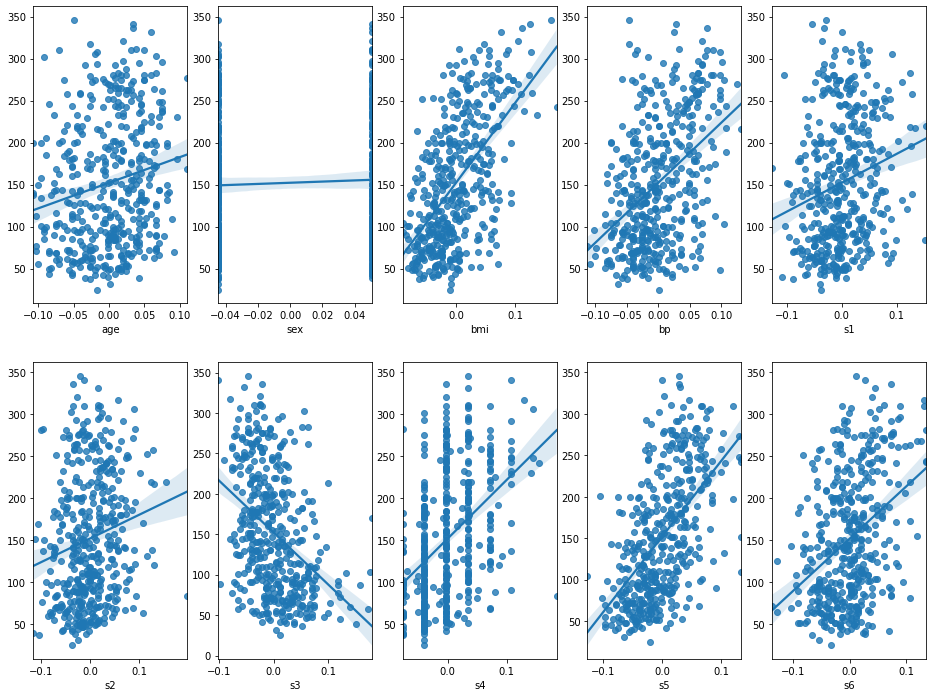

In [115]:

fig, axs = plt.subplots(nrows = 2, ncols = 5, figsize = (16,12))
for i, feature in enumerate(diabetes.feature_names):
    row, col = i//5, i%5   # 몫 ,나머지
    sns.regplot(x=feature, y=diabetes.target, data = df, ax=axs[row][col])

In [ ]:
X = df.iloc[:,:-1].values
y = diabetes.target
X.shape, y.shape

((442, 10), (442,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=2021
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((397, 10), (45, 10), (397,), (45,))

In [ ]:
from sklearn.tree import DecisionTreeRegressor        
dtc = DecisionTreeRegressor(random_state=2021)         
dtc.fit(X_train, y_train)

DecisionTreeRegressor(random_state=2021)

In [ ]:
dtc.score(X_test,y_test)

-0.5685902151129623

In [137]:
pred =dtc.predict(X_test)
len(pred)


45

In [134]:
for i in range(45):
    print(f'예측값:{pred[i]:.2f}, 실제값:{y_test[i]}')


예측값:127.00, 실제값:155.0
예측값:127.00, 실제값:167.0
예측값:206.00, 실제값:185.0
예측값:142.00, 실제값:109.0
예측값:127.00, 실제값:65.0
예측값:75.00, 실제값:77.0
예측값:168.00, 실제값:277.0
예측값:144.00, 실제값:244.0
예측값:118.00, 실제값:148.0
예측값:214.00, 실제값:102.0
예측값:70.00, 실제값:200.0
예측값:174.00, 실제값:162.0
예측값:113.00, 실제값:59.0
예측값:210.00, 실제값:147.0
예측값:181.00, 실제값:216.0
예측값:150.00, 실제값:144.0
예측값:78.00, 실제값:85.0
예측값:173.00, 실제값:131.0
예측값:202.00, 실제값:196.0
예측값:249.00, 실제값:212.0
예측값:128.00, 실제값:60.0
예측값:48.00, 실제값:252.0
예측값:96.00, 실제값:121.0
예측값:55.00, 실제값:78.0
예측값:275.00, 실제값:275.0
예측값:281.00, 실제값:336.0
예측값:168.00, 실제값:190.0
예측값:78.00, 실제값:221.0
예측값:182.00, 실제값:103.0
예측값:164.00, 실제값:156.0
예측값:90.00, 실제값:235.0
예측값:172.00, 실제값:102.0
예측값:109.00, 실제값:115.0
예측값:42.00, 실제값:276.0
예측값:185.00, 실제값:140.0
예측값:77.00, 실제값:83.0
예측값:136.00, 실제값:95.0
예측값:281.00, 실제값:151.0
예측값:52.00, 실제값:141.0
예측값:264.00, 실제값:128.0
예측값:303.00, 실제값:217.0
예측값:293.00, 실제값:170.0
예측값:109.00, 실제값:110.0
예측값:103.00, 실제값:191.0
예측값:75.00, 실제값:91.0


In [ ]:
from sklearn.metrics import r2_score  # R squared - 성능 평가 요소
r2_score(y_test, pred)                #(다중회귀 큰의미 x)

-0.5685902151129623

In [ ]:
from  sklearn.metrics import mean_squared_error        #MSE성능평가
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)             #Root mean squared error
mse, rmse                       ##mse가 높음 이상수치. 그래서 rmse?

(6832.311111111111, 82.65779522290146)

In [ ]:
y_test, pred

(array([155., 167., 185., 109.,  65.,  77., 277., 244., 148., 102., 200.,
        162.,  59., 147., 216., 144.,  85., 131., 196., 212.,  60., 252.,
        121.,  78., 275., 336., 190., 221., 103., 156., 235., 102., 115.,
        276., 140.,  83.,  95., 151., 141., 128., 217., 170., 110., 191.,
         91.]),
 array([127., 127., 206., 142., 127.,  75., 168., 144., 118., 214.,  70.,
        174., 113., 210., 181., 150.,  78., 173., 202., 249., 128.,  48.,
         96.,  55., 275., 281., 168.,  78., 182., 164.,  90., 172., 109.,
         42., 185.,  77., 136., 281.,  52., 264., 303., 293., 109., 103.,
         75.]))